In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr
A = fdr.DataReader('000080', '2018-01-01', '2019-11-30')

#Prophet

In [4]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
A['y'] = A['Close']
A['ds'] = A.index

In [5]:
#prophet 객체 선언 및 학습
m = Prophet(changepoint_prior_scale=0.8, #보통 changepoint_prior_scale= 0.05로 되어있음 
            yearly_seasonality=True,
            daily_seasonality=True
            )
m.fit(A)
future = m.make_future_dataframe(periods=30) #30일 예측
forecast = m.predict(future)#predict로 예측을 진행합니다. predict 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-30:-1] #예측 30일을 출력 합니다

,ds,yhat,yhat_lower,yhat_upper
470,2019-11-30,28801.374454,28242.946883,29358.486353
471,2019-12-01,28683.361298,28104.732852,29214.794569
472,2019-12-02,28551.673742,27972.674667,29113.433851
473,2019-12-03,28421.232856,27839.364897,28993.203545
474,2019-12-04,28342.192200,27763.232926,28896.255266
475,2019-12-05,28108.381819,27556.555538,28665.679820
476,2019-12-06,28023.149110,27417.038904,28578.690548
477,2019-12-07,27880.360803,27285.930673,28473.470913
478,2019-12-08,27730.895689,27105.797382,28327.026134
479,2019-12-09,27567.836653,26946.190021,28141.855740


시각화

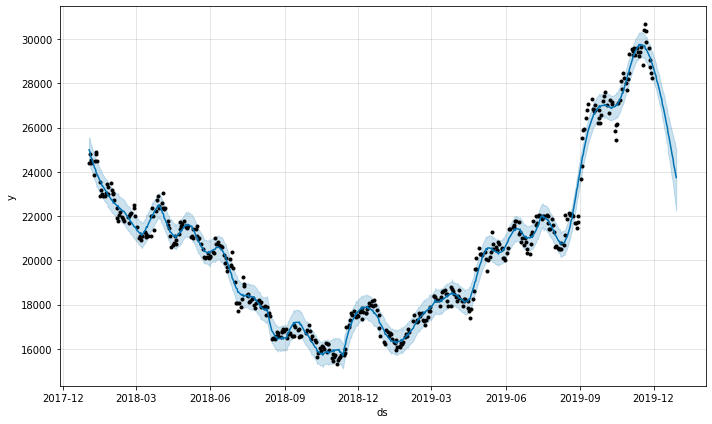

In [6]:
#plot은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.
fig = m.plot(forecast)

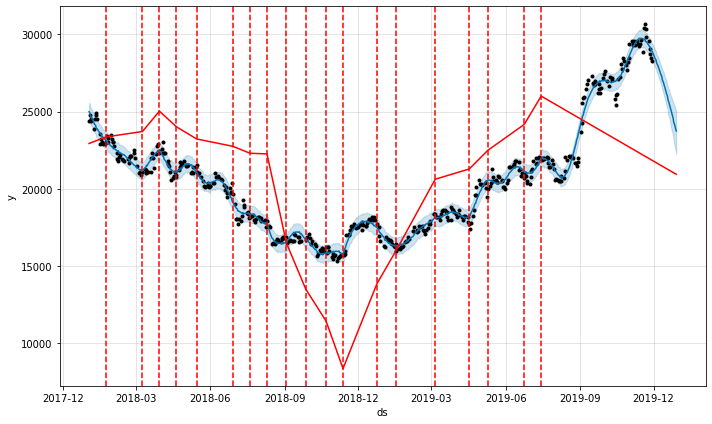

In [7]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [8]:
Close = A['Close']
yhat = forecast[['yhat']].iloc[0:470]
# RMSE
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Close, yhat) 
np.sqrt(MSE)

425.8463155168829

In [9]:
B = fdr.DataReader('000080', '2019-12-01', '2019-12-31') # test
B

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-12-02,28300,28650,27650,27800,260949,-0.015929
2019-12-03,27800,28600,27800,28550,410393,0.026978
2019-12-04,28550,29200,28450,29050,382032,0.017513
2019-12-05,29050,29100,28450,28550,147379,-0.017212
2019-12-06,28550,28750,28300,28450,142494,-0.003503
2019-12-09,28550,28800,27950,28000,325924,-0.015817
2019-12-10,28150,28150,27700,27900,235080,-0.003571
2019-12-11,27950,28650,27850,28450,223127,0.019713
2019-12-12,28300,28750,27800,28100,675334,-0.012302


In [10]:
B.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2019-12-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     int64  
 1   High    20 non-null     int64  
 2   Low     20 non-null     int64  
 3   Close   20 non-null     int64  
 4   Volume  20 non-null     int64  
 5   Change  20 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.1 KB


In [11]:
B['ds'] = B.index

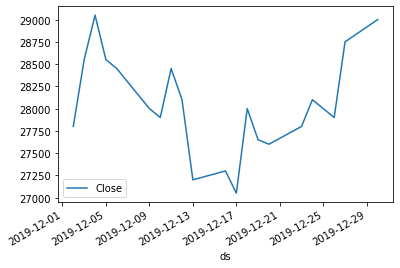

In [12]:
B.plot(x='ds', y='Close')

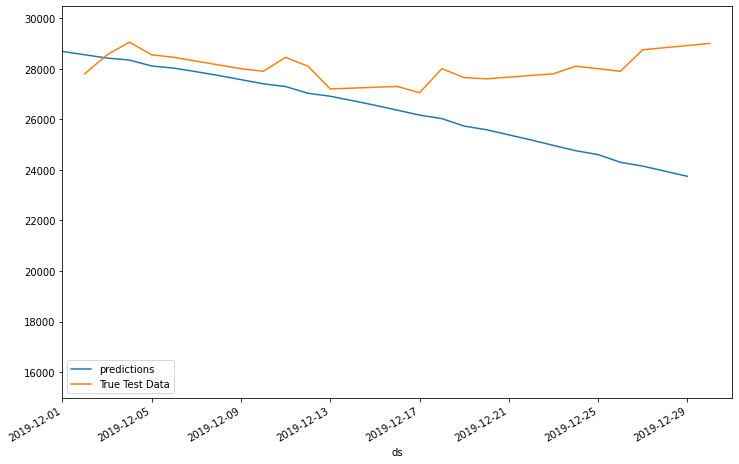

In [13]:
#m.plot(forecast)
ax = forecast[['yhat']].iloc[-1:-30]
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
B.plot(x='ds', y='Close', legend=True, label='True Test Data',ax=ax,xlim=('2019-12-01', '2019-12-31'))